#### Importing libraries and data and renaming columns
#### The elbow technique
#### k-means clustering

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler #imports Scaler function

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Load Clean file
path = "/Users/sharonthapa/Global Happiness_ST/Data/Cleaned/happiness_report_cleaned.csv"
df = pd.read_csv(path)

In [5]:
df.head()

,Country,Region,Year,Happiness Rank,Happiness Score,GDP per Capita,Health (Life Expectancy),Freedom,Trust in Government,Generosity
0,Afghanistan,Southern Asia,2015.0,153.0,3.575,0.320,0.303,0.234,0.097,0.365
1,Albania,Central and Eastern Europe,2015.0,95.0,4.959,0.879,0.813,0.357,0.064,0.143
2,Algeria,Middle East and Northern Africa,2015.0,68.0,5.605,0.939,0.618,0.286,0.174,0.078
3,Angola,Sub-Saharan Africa,2015.0,137.0,4.033,0.758,0.167,0.104,0.071,0.123
4,Argentina,Latin America and Caribbean,2015.0,30.0,6.574,1.054,0.787,0.450,0.085,0.115


In [6]:
df.columns

Index(['Country', 'Region', 'Year', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Health (Life Expectancy)', 'Freedom',
       'Trust in Government', 'Generosity'],
      dtype='object')

In [7]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Country                     0
Region                      0
Year                        0
Happiness Rank              0
Happiness Score             0
GDP per Capita              0
Health (Life Expectancy)    0
Freedom                     0
Trust in Government         0
Generosity                  0
dtype: int64

In [8]:
df.shape

(779, 10)

In [9]:
scaler=StandardScaler() #sets 'scaler' as a shortcut

## The elbow technique¶

In [11]:
# Select Variables for Exploratory Analysis

numeric_df = df.drop(columns=['Country', 'Region'])
print(numeric_df.columns)

Index(['Year', 'Happiness Rank', 'Happiness Score', 'GDP per Capita',
       'Health (Life Expectancy)', 'Freedom', 'Trust in Government',
       'Generosity'],
      dtype='object')


In [12]:
columns=numeric_df.columns.values.tolist() #create a list of column names for your df
columns #list the columns

['Year',
 'Happiness Rank',
 'Happiness Score',
 'GDP per Capita',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust in Government',
 'Generosity']

In [13]:
df_scaled=pd.DataFrame(scaler.fit_transform(numeric_df), columns=columns) #run the scaler on your numeric_df to a new 'df_scaled'
df_scaled.head() #show scaled df

,Year,Happiness Rank,Happiness Score,GDP per Capita,Health (Life Expectancy),Freedom,Trust in Government,Generosity
0,-1.40384,1.641822,-1.597369,-1.464699,-1.244089,-1.157873,-0.267740,1.194463
1,-1.40384,0.358128,-0.369992,-0.085562,0.813176,-0.353897,-0.579461,-0.618174
2,-1.40384,-0.239453,0.202901,0.062467,0.026575,-0.817980,0.459609,-1.148901
3,-1.40384,1.287700,-1.191199,-0.384087,-1.792693,-2.007604,-0.513339,-0.781474
4,-1.40384,-1.080494,1.062242,0.346190,0.708296,0.253988,-0.381093,-0.846795


In [14]:
numeric_df #compare with original df

,Year,Happiness Rank,Happiness Score,GDP per Capita,Health (Life Expectancy),Freedom,Trust in Government,Generosity
0,2015.0,153.0,3.575,0.320,0.303,0.234,0.097,0.365
1,2015.0,95.0,4.959,0.879,0.813,0.357,0.064,0.143
2,2015.0,68.0,5.605,0.939,0.618,0.286,0.174,0.078
3,2015.0,137.0,4.033,0.758,0.167,0.104,0.071,0.123
4,2015.0,30.0,6.574,1.054,0.787,0.450,0.085,0.115
...,...,...,...,...,...,...,...,...
774,2019.0,108.0,4.707,0.960,0.805,0.154,0.047,0.064
775,2019.0,94.0,5.175,0.741,0.851,0.543,0.073,0.147
776,2019.0,151.0,3.380,0.287,0.463,0.143,0.077,0.108
777,2019.0,138.0,4.107,0.578,0.426,0.431,0.087,0.247


In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-6232.0,
 -4123.9242827444405,
 -3230.4960182893105,
 -2905.264730796286,
 -2679.6805818165603,
 -2457.1486744746667,
 -2339.306188415206,
 -2162.0320713487313,
 -2032.4730099016601]

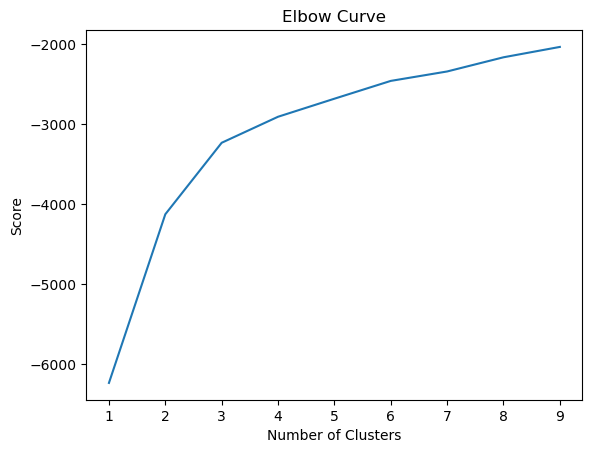

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### That the optimal count for clusters is 3
##### Data is suitable for the k-means clustering algorithm

#### Based on this analysis, we chose k=3 because:

#### It provides a balance between simplicity and variance explanation.
#### More clusters would lead to minimal improvements but increased complexity.
#### The elbow clearly suggests that k=3 is optimal.
#### Thus, we proceed with k=3 for clustering the dataset.

## k-means clustering

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [20]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

KMeans(n_clusters=3)

In [21]:
# copying df_scaled to clusters

df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

In [22]:
df_scaled.head()

,Year,Happiness Rank,Happiness Score,GDP per Capita,Health (Life Expectancy),Freedom,Trust in Government,Generosity,clusters
0,-1.40384,1.641822,-1.597369,-1.464699,-1.244089,-1.157873,-0.267740,1.194463,1
1,-1.40384,0.358128,-0.369992,-0.085562,0.813176,-0.353897,-0.579461,-0.618174,0
2,-1.40384,-0.239453,0.202901,0.062467,0.026575,-0.817980,0.459609,-1.148901,0
3,-1.40384,1.287700,-1.191199,-0.384087,-1.792693,-2.007604,-0.513339,-0.781474,1
4,-1.40384,-1.080494,1.062242,0.346190,0.708296,0.253988,-0.381093,-0.846795,0


In [23]:
df_scaled['clusters'].value_counts()

clusters
0    348
1    292
2    139
Name: count, dtype: int64

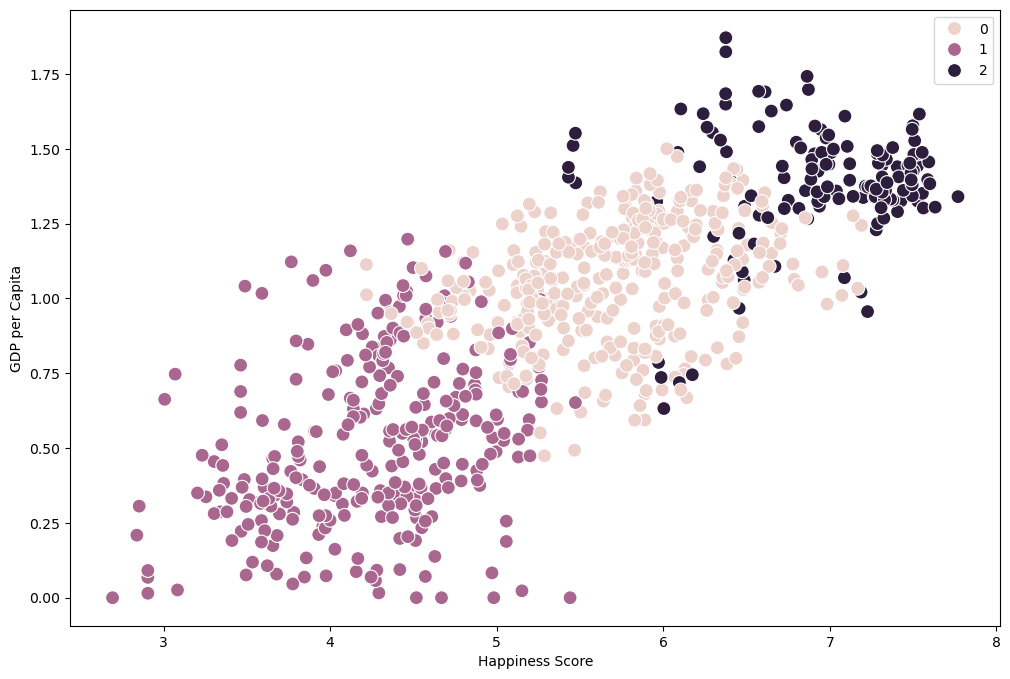

In [24]:
# Plot the clusters for the "Happiness Score" and "GDP per Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numeric_df['Happiness Score'], y=numeric_df['GDP per Capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('GDP per Capita') # Label y-axis.
plt.show()

#### The first cluster, in dark purple (coded as “2” in the legend), is also the least populated cluster. It gathers the data points with high GDP per capita and relatively high happiness score (with the exclusion of some extreme values. The second cluster, in pink (coded as “0” in the legend), is the most populated cluster, includes points with lower happiness score and lower GDP per capita than the first cluster—but higher on average than the third cluster. The third cluster, in medium purple (coded as “1” in the legend), contains the points with the low GDP per capita and low happiness score.

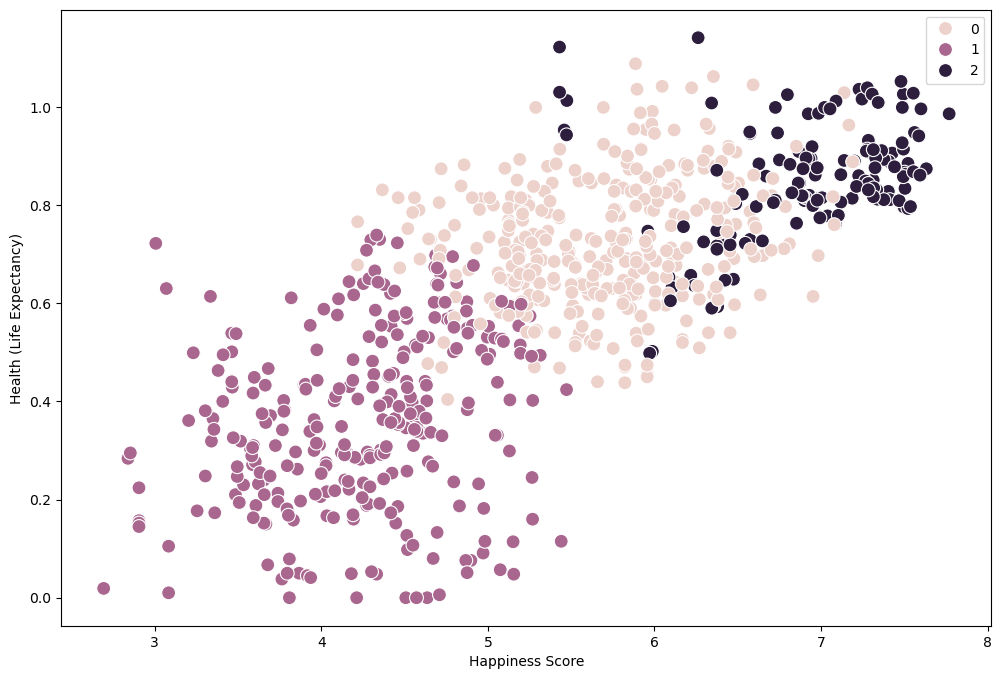

In [25]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numeric_df['Happiness Score'], y=numeric_df['Health (Life Expectancy)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Health (Life Expectancy)') # Label y-axis.
plt.show()

#### The first cluster, in dark purple (coded as “2” in the legend), is also the least populated cluster. It gathers the data points with very high life expectancy and high happiness score (with the exclusion of some extreme values at the top range). The second cluster, in purple (coded as “1” in the legend), includes points with low happiness score and lower life expectancy. The third cluster, in pink (coded as “0” in the legend), contains the points which is quite broad in nature. 

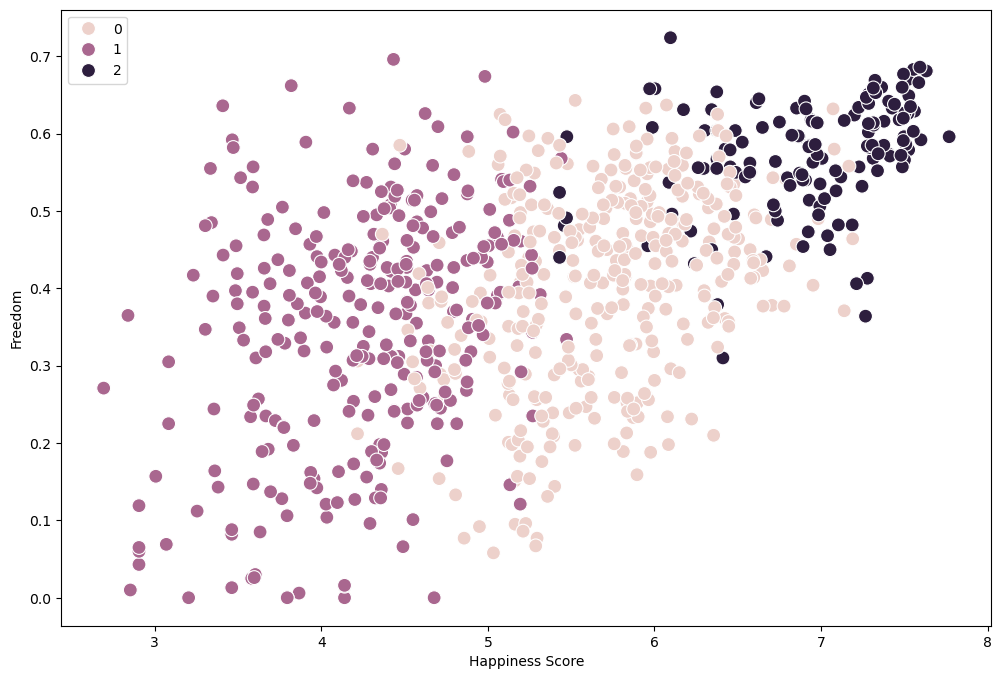

In [26]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numeric_df['Happiness Score'], y=numeric_df['Freedom'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Freedom') # Label y-axis.
plt.show()

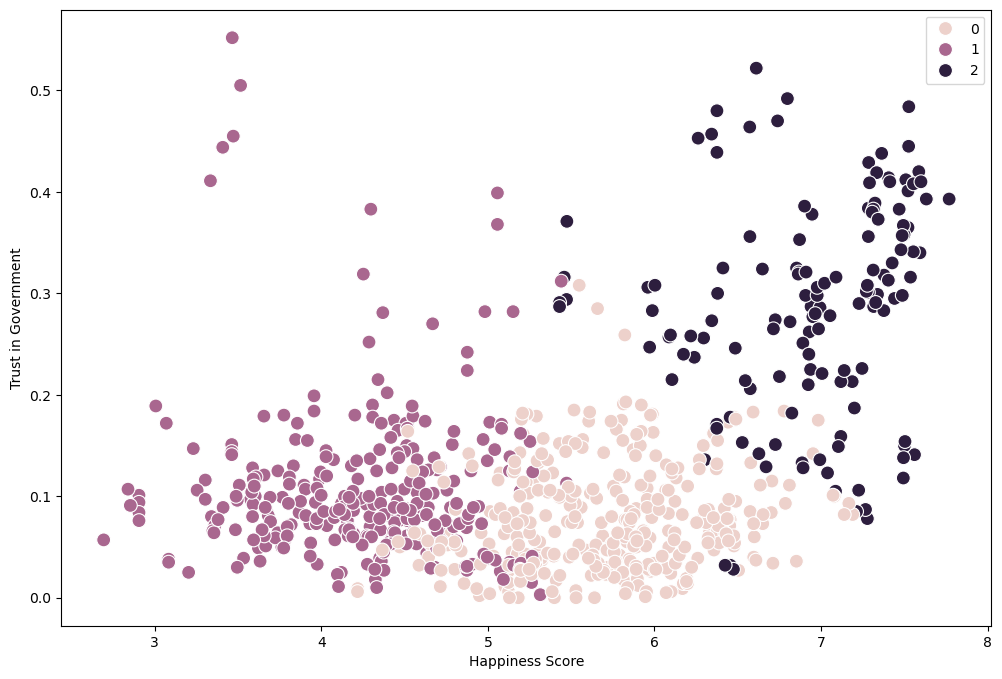

In [27]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numeric_df['Happiness Score'], y=numeric_df['Trust in Government'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Trust in Government') # Label y-axis.
plt.show()

#### I see some clusters here but clearer clusters with legend 1 and 0 compared to 2 which tells me that lower to medium trust in government seem to affect happiness. There are some countries that have very high trust in government but still seem to have low happiness score. 

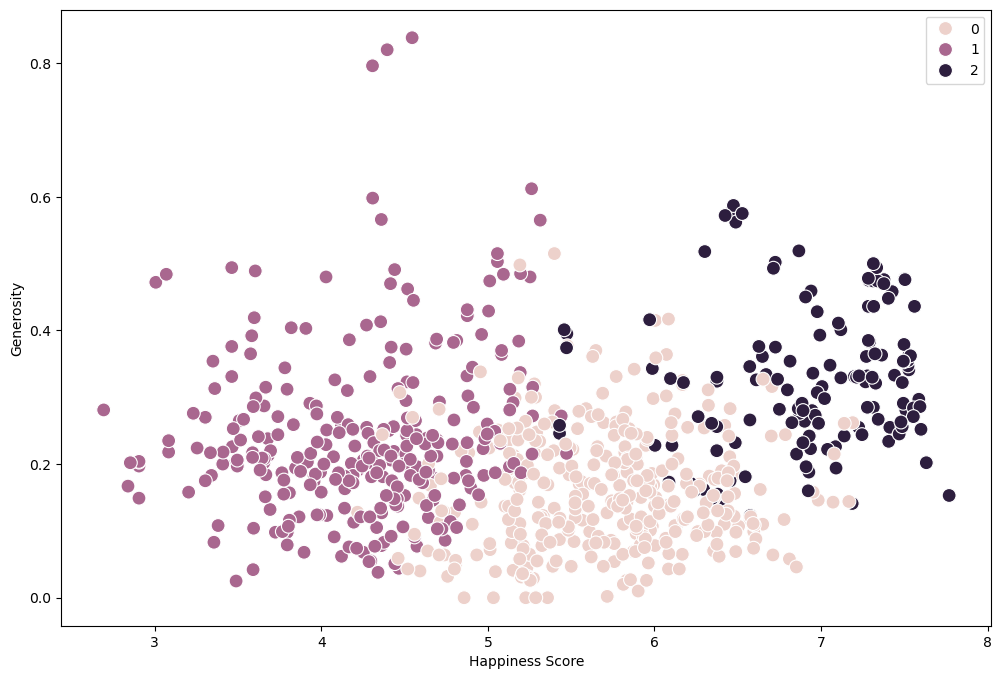

In [28]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numeric_df['Happiness Score'], y=numeric_df['Generosity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Generosity') # Label y-axis.
plt.show()

#### Some clerer clusters here with some outliers but generosity does not really seem to play a big role in happiness score. 3 countires, that are clear outliers, showing high generosity but medium happiness score. 

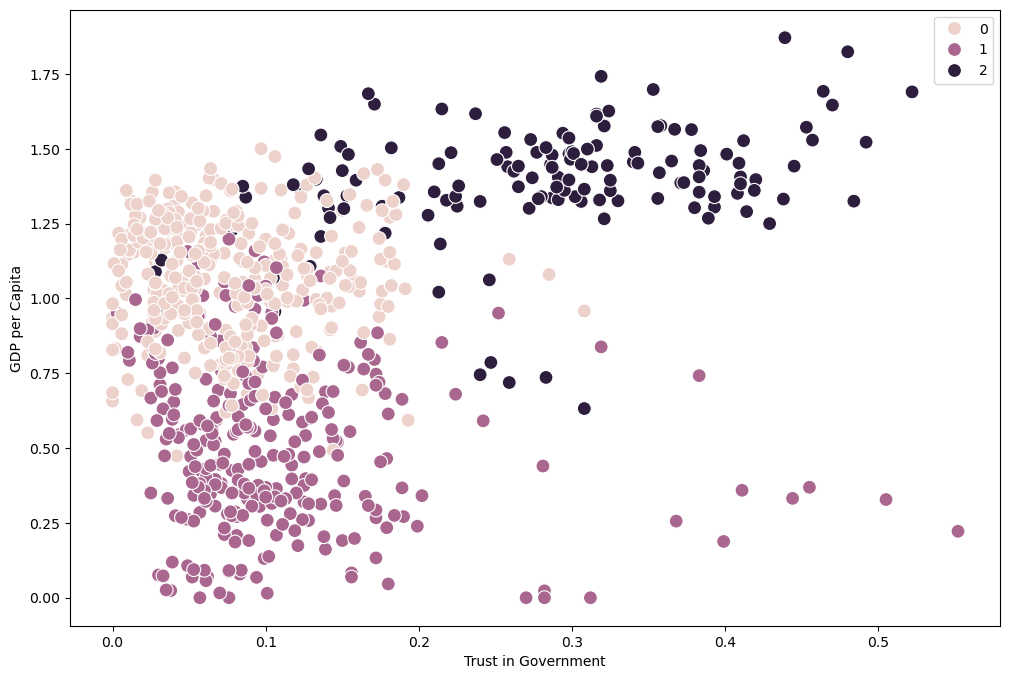

In [29]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numeric_df['Trust in Government'], y=numeric_df['GDP per Capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Trust in Government') # Label x-axis.
plt.ylabel('GDP per Capita') # Label y-axis.
plt.show()

#### Two distinct clusters are visible suggesting a higher gdp per capita and Lower trust in Government and vice versa for the other. 

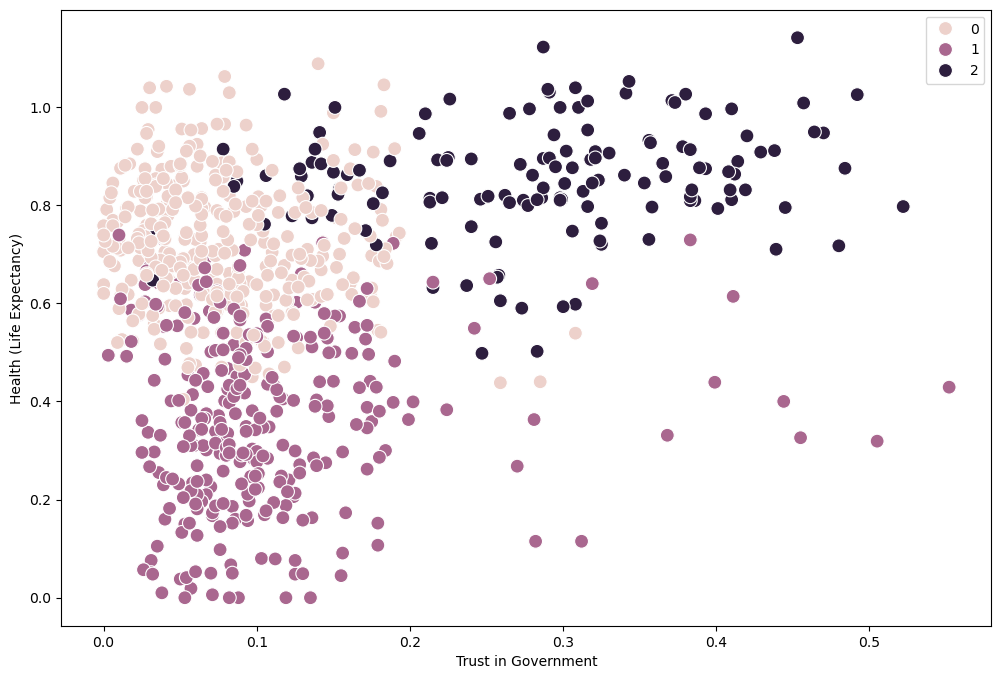

In [30]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numeric_df['Trust in Government'], y=numeric_df['Health (Life Expectancy)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Trust in Government') # Label x-axis.
plt.ylabel('Health (Life Expectancy)') # Label y-axis.
plt.show()

#### GDP per Capita and happiness score: a positive correlation, higher GDP tends to denote higher happiness score. However, the relationship is not absolute, indicating other factors that affect happiness. The data points are clustered, could represent different regoins or groups with similar characteristics. It shows that economic wealth contributes to happiness but it is not the sole determinant. 
#### Health (life expectancy) vs Happiness score: another positive correlation. Higher happiness score and varying health score, middle cluster shows moderate happiness score and mix of health score, generally trending lower than the upper left cluster. lower right cluster and low health score. 
#### Happiness score vs freedom: another slight negative correlation. However, there's a significant spread of data, indicating other factors likely influence these variables. 
#### Trust in government VS Happiness Score: The plot suggests a positive correlation between happiness and trustworthy government, though it is not strictly lenear. High trust= high happiness. low trust= lower happiness. However, there is a cluster with moderate happiness scores that exhibit a range of trust levels. 
#### Generosity vs Happiness: The plot appears to show clusters of data points which can indicate different groupings (regions) or trends within the data. a trend does show that happiness score increasing generosity to a certain point but it might plateau or even decrease. The 3 culsters are visible. 
#### GDP per Capita vs Trust in Government: 3 clusters. although there seems to some countries that trust the government yet have low GDP. 
#### Health (Life expectancy) VS Trust in Govermnet: The clusters suggest potential correlations between trust in government vs health outcomes, which needs to be further investigated. 

### Potential Insight: 
#### Explore the relationship between well-being (as measured by the happiness score) vs the perceptions of governance. 

In [31]:
df['clusters'] = df_scaled['clusters']

In [32]:
df.head()

,Country,Region,Year,Happiness Rank,Happiness Score,GDP per Capita,Health (Life Expectancy),Freedom,Trust in Government,Generosity,clusters
0,Afghanistan,Southern Asia,2015.0,153.0,3.575,0.320,0.303,0.234,0.097,0.365,1
1,Albania,Central and Eastern Europe,2015.0,95.0,4.959,0.879,0.813,0.357,0.064,0.143,0
2,Algeria,Middle East and Northern Africa,2015.0,68.0,5.605,0.939,0.618,0.286,0.174,0.078,0
3,Angola,Sub-Saharan Africa,2015.0,137.0,4.033,0.758,0.167,0.104,0.071,0.123,1
4,Argentina,Latin America and Caribbean,2015.0,30.0,6.574,1.054,0.787,0.450,0.085,0.115,0


In [69]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [73]:
df.groupby('cluster').agg({'Happiness Score':['mean', 'median'], 
                         'GDP per Capita':['mean', 'median'], 
                         'Health (Life Expectancy)':['mean', 'median'],
                          'Freedom':['mean', 'median'],
                           'Trust in Government':['mean', 'median'],
                           'Generosity':['mean', 'median']})

Happiness Score        GDP per Capita          \
                       mean median           mean  median   
cluster                                                     
dark purple        6.923676  6.985       1.388151  1.3980   
pink               5.706221  5.756       1.061437  1.0705   
purple             4.246264  4.318       0.511726  0.4775   

            Health (Life Expectancy)           Freedom         \
                                mean  median      mean median   
cluster                                                         
dark purple                 0.851568  0.8590  0.571612  0.582   
pink                        0.724658  0.7125  0.402940  0.418   
purple                      0.362127  0.3570  0.344531  0.369   

            Trust in Government         Generosity          
                           mean  median       mean  median  
cluster                                                     
dark purple            0.284597  0.2940   0.324201  0.3220  
pink                   0.077282  0.0655   0.160595  0.1485  
purple                 0.106815  0.0890   0.237753  0.2120

## Cluster Analysis & Interpretation

#### Happiness Score: The dark purple cluster has the highest happiness score (6.92), follwed by pink
#### GDP per Capita: Dark purple has the highest GDP per capita
#### Health (Life expectancy): Dark purple has highest health score
#### Freedom: The dark purple lead here too
#### Trust in government: Dark purple cluster shows higher trust in government
#### Generosity: The dark purple has the highest mean for generosity. 

### Interpretation:
#### The data shows positive correlation between happiness scores and other factors like GDP per capita, health, freedom, turst in goverment and generosity. The purple cluster has the lowest mean values, with the lowest happiness score. So these do seem to be key componants to national happiness. 
#### Middle income countries need more analysis as they don't seem to fit exactly in clusters. 

## Future steps of an analytics pipeline

### Decision-Making within the Government
### Economic and Social Research
### Business & Investment Strategies
### Trend analysis over time to understand long-term happiness changes

In [76]:
# Save the dataset with cluster
df_cluster = "/Users/sharonthapa/Global Happiness_ST/Data/Clustered/happiness_report_clustered.csv"
df.to_csv(df_cluster, index=False)